# Решение уравнения теплопроводности стержня 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
class Lab5(object):
    def __init__(self, input_data):
        self._init_matrix = input_data
        self._n = self._init_matrix.shape[0]
        self._m = self._init_matrix.shape[1]
    
    def _calculate_cell_value(self, i, j):
        value = self._init_matrix[i, j+1] + 4 * self._init_matrix[i,j]
        value += self._init_matrix[i, j-1]
        return value / 6.0
    
    def _calculate_final_matrix(self):
        for i in range(self._n - 1):
            for j in range(1, self._m-1):
                self._init_matrix[i+1, j] = self._calculate_cell_value(i, j)
    
    def _plot_matrix(self):
        fig = plt.figure(dpi=200)
        ax = fig.add_subplot(111)
        ax.grid(which='major')
        ax.grid(which='minor')
        ax.grid(True)
        for i in range(self._n):
            ax.plot(self._init_matrix[i, :], label="Ряд "+str(i))        
        leg = plt.legend(
            bbox_to_anchor=(0.795,1.01), bbox_transform=plt.gcf().transFigure, ncol=3
        
        )
        leg_lines = leg.get_lines()
        leg_texts = leg.get_texts()
        plt.setp(leg_lines, linewidth=2)
        plt.show()
    
    def _print_matrix(self, message):
        print(message)
        data = pd.DataFrame(self._init_matrix)
        display(data)
    
    def main(self):
        self._print_matrix("Исходные данные")
        self._calculate_final_matrix()
        self._plot_matrix()
        self._print_matrix("Результат")

## Решение уравнения из лабораторной работы

Исходные данные


,0,1,2,3,4,5,6,7,8,9,10
0,20.0,23.0,25.0,28.0,30.0,33.0,35.0,37.0,38.0,39.0,40.0
1,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
2,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
3,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
5,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
6,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
9,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0


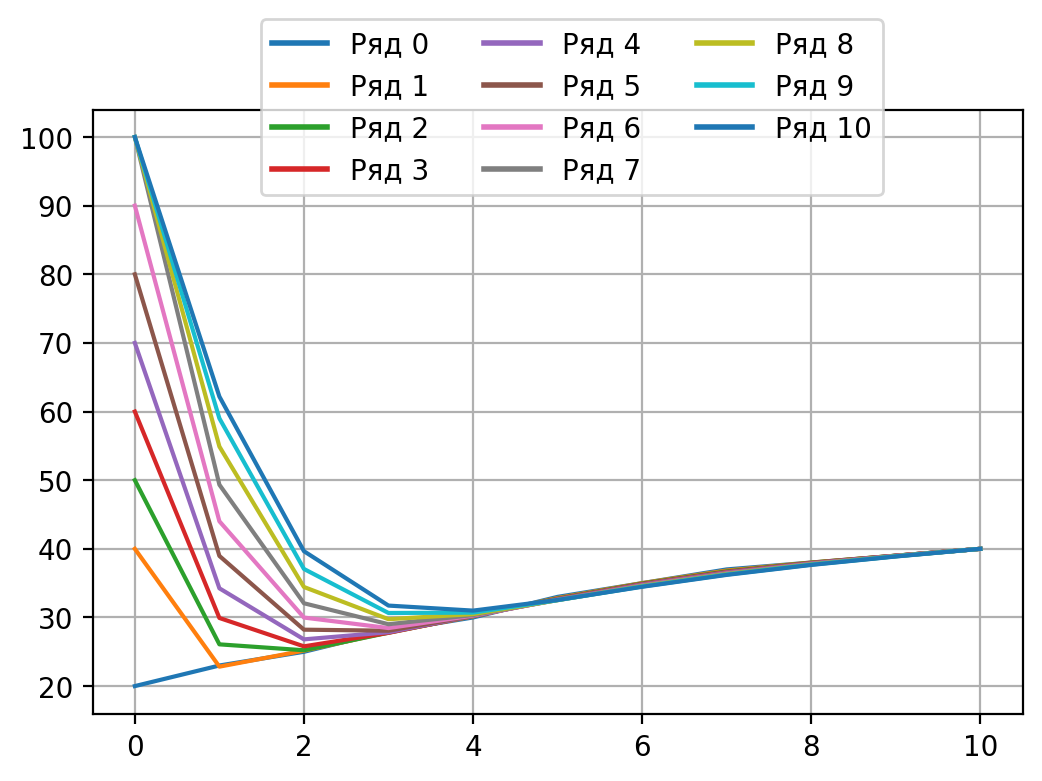

Результат


,0,1,2,3,4,5,6,7,8,9,10
0,20.0,23.000000,25.000000,28.000000,30.000000,33.000000,35.000000,37.000000,38.000000,39.000000,40.0
1,40.0,22.833333,25.166667,27.833333,30.166667,32.833333,35.000000,36.833333,38.000000,39.000000,40.0
2,50.0,26.083333,25.222222,27.777778,30.222222,32.750000,34.944444,36.722222,37.972222,39.000000,40.0
3,60.0,29.925926,25.791667,27.759259,30.236111,32.694444,34.875000,36.634259,37.935185,38.995370,40.0
4,70.0,34.249228,26.808642,27.844136,30.233025,32.648148,34.804784,36.557870,37.895062,38.986111,40.0
5,80.0,38.967593,28.221322,28.069702,30.237397,32.605067,34.737526,36.488555,37.854038,38.973251,40.0
6,90.0,44.015282,29.987097,28.456254,30.270726,32.565865,34.673954,36.424297,37.812993,38.957840,40.0
7,100.0,49.341371,32.069987,29.013807,30.350837,32.534690,34.614330,36.364022,37.772352,38.940726,40.0
8,100.0,54.905912,34.439188,29.746009,30.491974,32.517321,34.559339,36.307129,37.732359,38.922542,40.0
9,100.0,59.010473,37.068112,30.652533,30.705205,32.520100,34.510301,36.253369,37.693185,38.903755,40.0


In [31]:
input_matrix = np.zeros((11, 11), dtype="float")
top_edge = np.array([20, 23, 25, 28, 30, 33, 35, 37, 38, 39, 50], dtype="float")
left_edge = np.array([20, 40, 50, 60, 70, 80, 90, 100, 100, 100, 100], dtype="float")
right_edge = np.ones(11) * 40.0

input_matrix[0, :] = top_edge
input_matrix[:, 0] = left_edge
input_matrix[:, -1] = right_edge

lab5 = Lab5(input_matrix)
lab5.main()

## Решение уравнения из лекции

Исходные данные


,0,1,2,3,4,5,6,7,8,9,10
0,10.0,15.0,20.0,25.0,30.0,33.0,35.0,37.0,38.0,39.0,40.0
1,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
3,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
4,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
5,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
6,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
7,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
8,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
9,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0


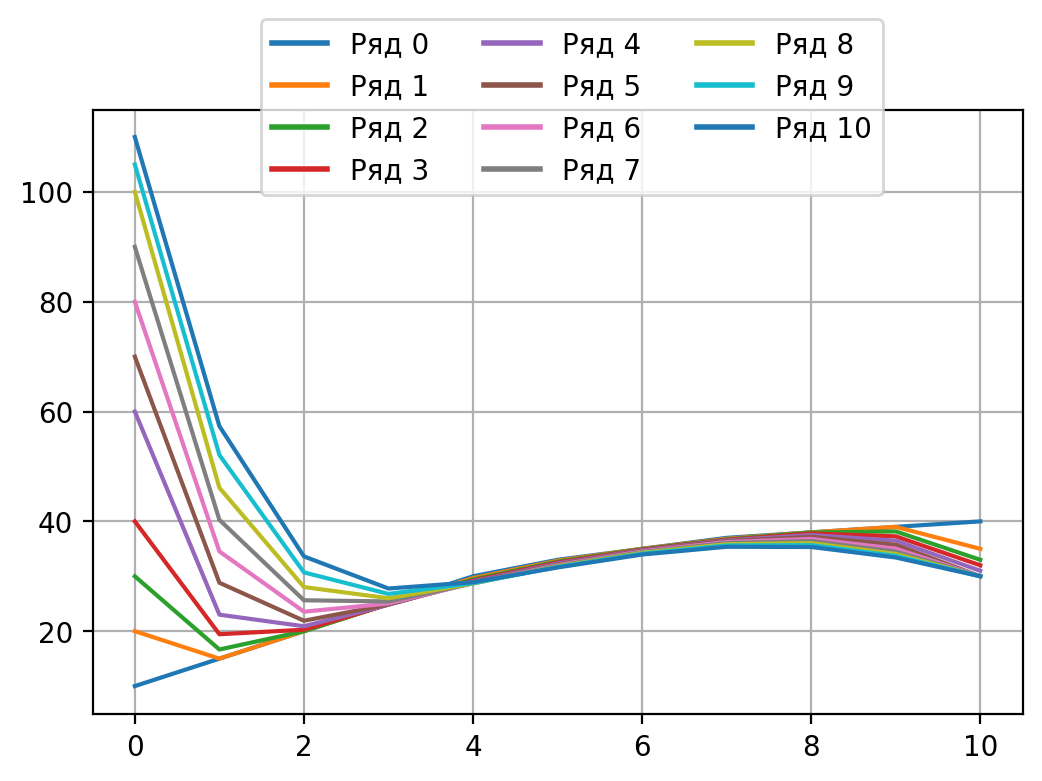

Результат


,0,1,2,3,4,5,6,7,8,9,10
0,10.0,15.000000,20.000000,25.000000,30.000000,33.000000,35.000000,37.000000,38.000000,39.000000,40.0
1,20.0,15.000000,20.000000,25.000000,29.666667,32.833333,35.000000,36.833333,38.000000,39.000000,35.0
2,30.0,16.666667,20.000000,24.944444,29.416667,32.666667,34.944444,36.722222,37.972222,38.166667,33.0
3,40.0,19.444444,20.268519,24.865741,29.212963,32.504630,34.861111,36.634259,37.796296,37.273148,32.0
4,60.0,23.007716,20.897377,24.824074,29.037037,32.348765,34.763889,36.532407,37.515432,36.481481,31.0
5,70.0,28.821373,21.903549,24.871785,28.886831,32.199331,34.656121,36.401492,37.179270,35.740226,30.0
6,80.0,34.531507,23.551226,25.046253,28.769740,32.056713,34.537551,36.240226,36.809799,35.023362,30.0
7,90.0,40.279542,25.630444,25.417663,28.696988,31.922357,34.407858,36.051376,36.417131,34.483875,30.0
8,100.0,46.124769,28.036497,25.999681,28.687995,31.799046,34.267527,35.838415,36.033963,34.058772,30.0
9,105.0,52.089262,30.711740,26.787203,28.758451,31.691951,34.117928,35.609192,35.672173,33.711508,30.0


In [32]:
input_matrix = np.zeros((11, 11), dtype="float")
top_edge = np.array([10, 15, 20, 25, 30 ,33, 35, 37, 38, 39, 40], dtype="float")
left_edge = np.array([10, 20, 30, 40, 60, 70, 80, 90, 100, 105, 110], dtype="float")
right_edge = np.array([40, 35, 33, 32, 31, 30, 30, 30, 30, 30, 30], dtype="float")

input_matrix[0, :] = top_edge
input_matrix[:, 0] = left_edge
input_matrix[:, -1] = right_edge

lab5 = Lab5(input_matrix)
lab5.main()